In [1]:
using Pkg

#Pkg.activate("path/to/project")
#Pkg.activate("~/CodeProjects/RosenbluthChains/")
###julia ];usi activate ; dev --local PathToRosenbluthPackage
#Pkg.instantiate()
using RosenbluthChains, Plots, DelimitedFiles

### Define a measurement which only saves the positions of one configuration

In [2]:
### type definition
mutable struct My_Measurement{T<:Real} <: AbstractMeasurement 
    x::Vector{T}
    y::Vector{T}
    z::Vector{T}
end
My_Measurement(N::Int) = My_Measurement{Float64}(zeros(N), zeros(N), zeros(N)) ### constructs a Measurement 

### initialise measurments with empty vectors
function RosenbluthChains.InitMeasurement(data::SimData, param::SimulationParameters, Tmp::My_Measurement) 
    return My_Measurement(data.NBeads)
end 


### does nothing
# 
function RosenbluthChains.MeasureAfterBatch(data::SimData, param::SimulationParameters, Measurement::My_Measurement) 
    nothing
end

# updates the measurement vectors with the coordinates of the beads after each chain growth step.
function RosenbluthChains.MeasureAfterChainGrowth(data::SimData, param::SimulationParameters,Measurement::My_Measurement) 
    Measurement.x = getindex.(data.xyz, 1) ### gets the first element for each element of data.xyz
    Measurement.y = getindex.(data.xyz, 2) ### gets the second element for each element of data.xyz
    Measurement.z = getindex.(data.xyz, 3) ### gets the third element for each element of data.xyz
end

### does nothing
function SaveMeasurements(data::SimData, param::SimulationParameters,Measurement::My_Measurement) 
    nothing
end

SaveMeasurements (generic function with 1 method)

### Example for Fixed Radius, Random Bond Angles, Random, Dihedral Angles and No nonbonded Interactions

In [3]:
### define the modelling of a protein/polymer
r =1.0
My_Polymer_Model = SimulationParameters( FixedBondParameters(r),RandBondAngle(), RandTorsion(), IdealChain())

SimulationParameters{Float64, Int64}(FixedBondParameters{Float64}(1.0), RandBondAngle(), RandTorsion(), IdealChain())

In [4]:
### define the meta parameters for the simulation
PathToFolder="./test/" ### folder path that can be used to store data
My_Number = 1.0 ### Only used to determine type => could and should be done in a nicer way
NBeads = 100 ### number of beads in a polymer
NTrial = 8 ### number of trials positions that are tried at each move
PolymerConfigurationPerBacth = 1 ### we create 1 polymer per batch
N_Batches = 1 ### we simulate for 1 beach => we create one polymer 

My_Simulation_Data = SimData(PathToFolder, 1.0, NBeads, NTrial, PolymerConfigurationPerBacth, N_Batches)

SimData{Float64, Int64}("./test/", 100, 8, 1, 1, 1.0, 1, 1, -1, 0, 0, StaticArraysCore.MVector{3, Float64}[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]  …  [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]], 0.0, 0.0, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], StaticArraysCore.MVector{3, Float64}[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0,

In [5]:
Result = RunSim(My_Simulation_Data,My_Polymer_Model, My_Measurement(My_Simulation_Data.NBeads));

### plot of the polymer model in the last result

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

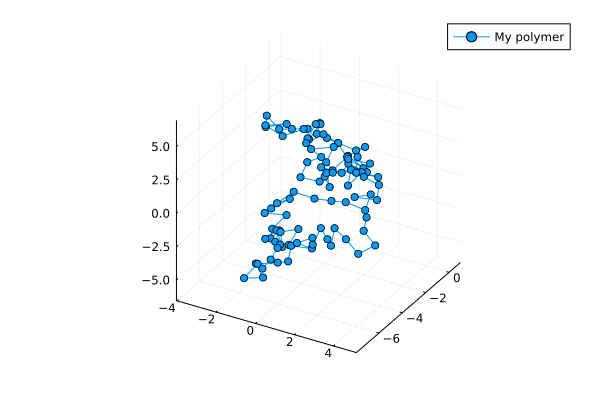

In [6]:
Plots.plot(Result.x, Result.y, Result.z, marker=:dot, label="My polymer")

### Exercise Define a polymer with fixed BondAngles using the preimplemented version in SpecificModels.jl

In [7]:
# the input for the struct is a vector of set bond angles of length n
# the angle between beads i, i+1, i+2 is defined by vector element array[i+2] 

### Exercise Implement a harmonic bond angle potential.
### You can follow the steps done for the harmonic bond length potential


In [8]:
#https://hoomd-blue.readthedocs.io/en/v4.7.0/module-md-angle.html#hoomd.md.angle.Harmonic
mutable struct HarmonicBondLength{T<:Real} <: RosenbluthChains.AbstractBondParam 
    k  ::T ### bond strength for all particles
    r0 ::T ### minima of the bond length potential
    Δr ::T ### sampling width=> take values from interval [r0-Δr, r0+Δr]
end
HarmonicBondLength(k ::T, r0::T, Δr::T) where {T<:Real} = My_Measurement{T}(k, r0, Δr) ### constructs a Measurement 

@inline function SetTrialRadius(data::SimData, param::HarmonicBondLength)
   rand!(data.trial_radius, eltype(data.TType)) ### created NTrial many random number ∈ [0,1]
   data.trial_radius .*= 2.0*param.Δr ### ∈ [0, 2Δr]
   data.trial_radius .+= param.r0-param.Δr ### ∈ [r0-Δr, r0+Δr]
   return nothing
end


@inline function GetTrialBoltzmannWeight(data::SimData,param::HarmonicBondLength) 
    fill!(data.tmp4, 0.0) ### temporary array of length NTrials that i will use to store the energy

    data.tmp4  .= @. 1.0/2.0*(data.trial_radius-r0)^2 ### compute energies

    ### here comes a numerical trick to stabilise, we add the energies of al potentials first and take the exponential in "GetTrialBoltzmannWeight" before we have to choose the positions in "ChooseTrialPosition"
    # -= since we have to add all energies and take exp(-kt*E); kt=1
    data.LogBoltzmannFaktor .-= data.tmp4
    return nothing
end


GetTrialBoltzmannWeight (generic function with 1 method)

In [9]:
using Random

# Correctly initialize My_Measurement with vectors
mutable struct My_Measurement{T<:Real} <: AbstractMeasurement 
    x::Vector{T}
    y::Vector{T}
    z::Vector{T}
end

# Constructor to initialize My_Measurement with zero vectors
My_Measurement(N::Int) = My_Measurement{Float64}(zeros(N), zeros(N), zeros(N))

# Define the HarmonicBondLength struct
mutable struct HarmonicBondLength{T<:Real} <: RosenbluthChains.AbstractBondParam 
    k  ::T # Bond strength for all particles
    r0 ::T # Minima of the bond length potential
    Δr ::T # Sampling width => take values from interval [r0-Δr, r0+Δr]
end

HarmonicBondLength(k ::T, r0::T, Δr::T) where {T<:Real} = HarmonicBondLength{T}(k, r0, Δr)


function RosenbluthChains.InitSimParam(data::SimData{R, I}, param::HarmonicBondLength{R}) where {R<:Real, I<: Integer}
    nothing 
end

#function RosenbluthChains.SetTrialRadius(data::SimData{R, I}, B::HarmonicBondLength{R}) #where {R<:Real, I<: Int}
#    nothing 
#end

@inline function RosenbluthChains.SetTrialRadius(data::SimData{R, I}, param::HarmonicBondLength{R}) where {R<:Real, I<:Integer}
    rand!(data.trial_radius, eltype(data.TType)) ### created NTrial many random number ∈ [0,1]
    data.trial_radius .*= 2.0*param.Δr ### ∈ [0, 2Δr]
    data.trial_radius .+= param.r0-param.Δr ### ∈ [r0-Δr, r0+Δr]
    return nothing
 end
 
 
 @inline function RosenbluthChains.GetTrialBoltzmannWeight(data::SimData{R, I}, param::HarmonicBondLength{R}) where {R<:Real, I<:Integer}
     fill!(data.tmp4, 0.0) ### temporary array of length NTrials that i will use to store the energy
 
     data.tmp4  .= @. 1.0/2.0*param.k*(data.trial_radius-param.r0)^2 ### compute energies
 
     ### here comes a numerical trick to stabilise, we add the energies of al potentials first and take the exponential in "GetTrialBoltzmannWeight" before we have to choose the positions in "ChooseTrialPosition"
     # -= since we have to add all energies and take exp(-kt*E); kt=1
     data.LogBoltzmannFaktor .-= data.tmp4
     return nothing
 end
 

# Correctly initialize My_New_Polymer_Model with the new HarmonicBondLength parameters
#=My_New_Polymer_Model = SimulationParameters(
    HarmonicBondLength(10.0, 4.0, 1.0), 
    RandBondAngle(), 
    RandTorsion(), 
    IdealChain()
)=#

In [10]:
New_Result = RunSim(My_Simulation_Data,My_Polymer_Model, My_Measurement(My_Simulation_Data.NBeads));

In [11]:
println(My_Simulation_Data.RosenbluthWeight)

1.0


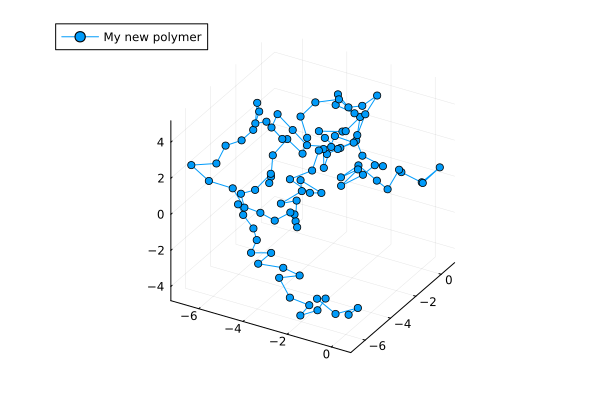

In [12]:
Plots.plot(New_Result.x, New_Result.y, New_Result.z, marker=:dot, label="My new polymer")

### Advanced Exercise: How can you check whether my implementation follows the distribution i claim? Implement it as a measurement

In [13]:
using LinearAlgebra

function calculate_center_distances(x::Vector{Float64}, y::Vector{Float64}, z::Vector{Float64})
    center_distances = Float64[]
    num_beads = length(x)

    for i in 1:(num_beads-1)
        center1 = [(x[i] + x[i+1]) / 2, (y[i] + y[i+1]) / 2, (z[i] + z[i+1]) / 2]
        for j in (i+1):num_beads
            center2 = [(x[j-1] + x[j]) / 2, (y[j-1] + y[j]) / 2, (z[j-1] + z[j]) / 2]
            dist = sqrt((center2[1] - center1[1])^2 + (center2[2] - center1[2])^2 + (center2[3] - center1[3])^2)
            push!(center_distances, dist)
        end
    end

    return center_distances
end

function calculate_center_distances_YW(x::Vector{Float64}, y::Vector{Float64}, z::Vector{Float64})
    num_beads = length(x)
    distances = zeros(num_beads)

    for i in 1:(num_beads-1)
        distances[i] = sqrt((x[i+1]-x[i])^2 + (y[i+1]-y[i])^2 + (z[i+1]-z[i])^2)
    end
    ### this can also be written like this with the prodcasting using the .+ operations etc.
    # distances  = @. sqrt((x[2:end]-x[1:end-1])^2 + (y[2:end]-y[1:end-1])^2 + (z[2:end]-z[1:end-1])^2)

    return distances
end

calculate_center_distances_YW (generic function with 1 method)

In [14]:
#file_path = joinpath(homedir(), "Desktop", "praktyki", "distances.txt")

file_path = joinpath("/localscratch/Hiwi/", "Desktop", "praktyki",)
mkpath(file_path)
file_path =joinpath(file_path, "distances.txt")


# Measurement function to calculate center-to-center distances and write them to a file
function RosenbluthChains.MeasureAfterBatch(data::SimData, param::SimulationParameters, Measurement::My_Measurement)
    center_distances = calculate_center_distances_YW(Measurement.x, Measurement.y, Measurement.z)
    open(file_path, "w") do io
        for dist in center_distances
            println(io, dist)
        end
    end
end

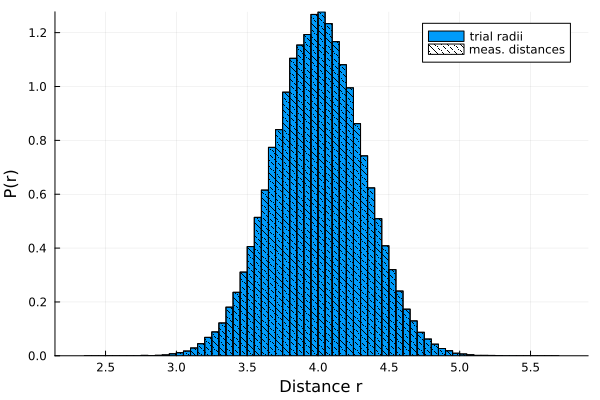

In [15]:

# Re-run the simulation with the updated measurement

@inline function crossprod( a::Vector3{T},b::Vector3{T}, c::Vector3{T}) where{T<:Real}
    c[1] =a[2]*b[3]-a[3]*b[2]
    c[2] =a[3]*b[1]-a[1]*b[3]
    c[3] =a[1]*b[2]-a[2]*b[1]
    nothing
end

# Example parameters for harmonic potential and temperature (adjust as needed)
k = 10.0         # Spring constant
r0 = 4.0         # Equilibrium distance
temperature = 1.0  # Temperature

BondParam = HarmonicBondLength(k, r0, 2.0)

New_Polymer_Model = SimulationParameters( BondParam,RandBondAngle(), RandTorsion(), IdealChain())

New_Result = RunSim(My_Simulation_Data, New_Polymer_Model, My_Measurement(My_Simulation_Data.NBeads))

# emulate the creation of 100_000 bond distances and their weights
N = 100_000
Weights = zeros(N)
distances = zeros(N)
radii = zeros(N)
My_Simulation_Data.id = 3

### do some set up
My_Simulation_Data.tmp1 .= My_Simulation_Data.xyz[3].-My_Simulation_Data.xyz[2]
crossprod( My_Simulation_Data.xyz[2]-My_Simulation_Data.xyz[1], My_Simulation_Data.tmp1,My_Simulation_Data.crossproduct)
My_Simulation_Data.current .= My_Simulation_Data.tmp1
for i in 1:N ### we overwrite bead 4 all the time
    My_Simulation_Data.RosenbluthWeight = 1 ### reset the weight
    My_Simulation_Data.LogRosenbluthWeight=0.0
    My_Simulation_Data.id = 4

    ### emulate the step which selects the radius
    RosenbluthChains.SetTrialRadius(My_Simulation_Data, New_Polymer_Model)
    RosenbluthChains.SetTrialBondAngle(My_Simulation_Data, New_Polymer_Model)
    RosenbluthChains.SetTrialTorsionAngle(My_Simulation_Data, New_Polymer_Model)
    RosenbluthChains.ComputeTrialPositions(My_Simulation_Data,New_Polymer_Model)
    RosenbluthChains.ChooseTrialPosition(My_Simulation_Data, New_Polymer_Model)

    My_Simulation_Data.xyz[4] .= My_Simulation_Data.trial_positions[My_Simulation_Data.tid]
    Weights[i] = My_Simulation_Data.RosenbluthWeight
    radii[i] = My_Simulation_Data.trial_radius[My_Simulation_Data.tid]
    ### data.xyz stores vector3 types which represent a normal 3d vector for which -,+,* are defined
    distances[i] = RosenbluthChains.norm(My_Simulation_Data.xyz[4]-My_Simulation_Data.xyz[3]) ### in case you wouldnt trust the implementation which builds on top of .trial_radius
end

fig = histogram(radii, weights=Weights, bins=100, xlabel="Distance r", ylabel="P(r)", normalize=:pdf, label="trial radii")
histogram!(distances, weights=Weights, bins=100, xlabel="Distance r", ylabel="P(r)", normalize=:pdf, label="meas. distances", alpha=1.0, fillstyle=:\, c=:black)
fig 

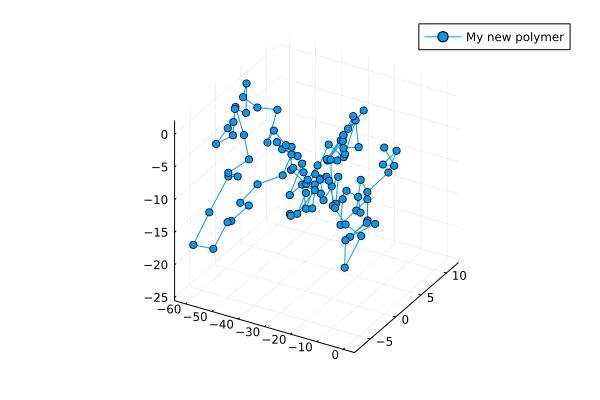

In [16]:

Plots.plot(New_Result.x, New_Result.y, New_Result.z, marker=:dot, label="My new polymer")

# Calculate and save center-to-center distances after the simulation
#RosenbluthChains.MeasureAfterBatch(My_Simulation_Data, New_Polymer_Model, New_Result)

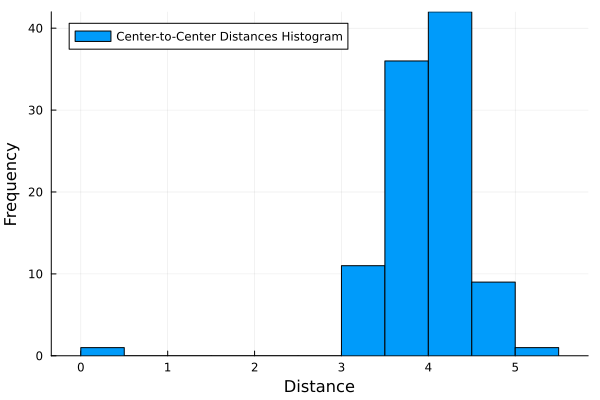

In [17]:
using Plots

# Function to read distances from file and create a histogram
function create_histogram(file_path::String)
    # Read distances from file
    distances = readdlm(file_path, Float64)

    # Create histogram
    histogram(distances, bins=20, xlabel="Distance", ylabel="Frequency", label="Center-to-Center Distances Histogram")
end

# Create histogram from the data in the file
create_histogram(file_path)

In [18]:
function calculate_probability_distribution(energies::Vector{Float64})
    Z = sum(exp.(-energies))
    return exp.(-energies) / Z
end

calculate_probability_distribution (generic function with 1 method)

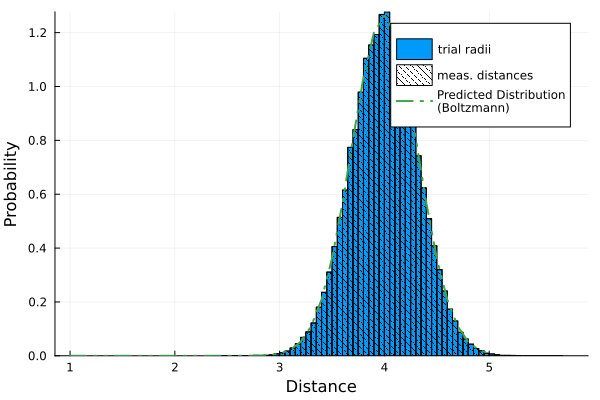

In [19]:
using Statistics, Plots

# Function to calculate harmonic energy based on distance
function harmonic_energy(distance::Float64, k::Float64, r0::Float64)
    return 0.5 * k * (distance - r0)^2
end

# Function to calculate probability distribution with Boltzmann factor
function calculate_probability_distribution_boltzmann(distances::Vector{Float64}, k::Float64, r0::Float64, temperature::Float64)
    energies = [harmonic_energy(dist, k, r0) for dist in distances]
    Z = sum(exp.(-energies / temperature))
    return exp.(-energies / temperature) / Z
end

# Function to create predicted distribution curve with Boltzmann factor
function create_distribution_curve_boltzmann(distances::Vector{Float64}, k::Float64, r0::Float64, temperature::Float64)
    prob_distribution = calculate_probability_distribution_boltzmann(distances, k, r0, temperature)
    return distances, prob_distribution
end

# Example distances (replace with actual data or load from file)
distances = collect(1.0:0.1:5.0)

# Create predicted distribution curve with Boltzmann factor
distances_curve, prob_distribution_curve = create_distribution_curve_boltzmann(distances, k, r0, temperature)

# Plot the predicted distribution curve with smooth line
plot!(fig, distances_curve, prob_distribution_curve/(distances_curve[2]-distances_curve[1]), line=:auto, lw=2, xlabel="Distance", ylabel="Probability", label="Predicted Distribution\n(Boltzmann)")
fig

In [20]:
#import Pkg
#Pkg.add("StatsBase")

In [21]:
using Statistics, Plots

# Function to calculate harmonic energy based on distance
function harmonic_energy(distance::Float64, k::Float64, r0::Float64)
    return 0.5 * k * (distance - r0)^2
end

# Function to calculate probability distribution with Boltzmann factor
function calculate_probability_distribution_boltzmann(distances::Vector{Float64}, k::Float64, r0::Float64, temperature::Float64)
    energies = [harmonic_energy(dist, k, r0) for dist in distances]
    Z = sum(exp.(-energies / temperature))
    return exp.(-energies / temperature) / Z
end

# Function to create predicted distribution curve with Boltzmann factor
function create_distribution_curve_boltzmann(distances::Vector{Float64}, k::Float64, r0::Float64, temperature::Float64)
    prob_distribution = calculate_probability_distribution_boltzmann(distances, k, r0, temperature)
    return distances, prob_distribution
end

# Function to read distances from file and create a histogram
function create_histogram(file_path::String)
    # Read distances from file
    distances = readdlm(file_path, Float64)

    # Create histogram normalized to unity area
    hist = histogram(distances, bins=20, xlabel="Distance", ylabel="Frequency", label="Distances Histogram", normalized=true)

    return hist
end

#file_path = joinpath(homedir(), "Desktop", "praktyki", "distances.txt")

# Example parameters for harmonic potential and temperature (adjust as needed)
#k = 10.0         # Spring constant
#r0 = 2.0         # Equilibrium distance
#temperature = 1.0  # Temperature

# Example distances
distances = collect(1.0:0.1:5.0)

# Create predicted distribution curve with Boltzmann factor
distances_curve, prob_distribution_curve = create_distribution_curve_boltzmann(distances, k, r0, temperature)

# Create histogram from the data in the file
histogram_data = create_histogram(file_path)

# Plot both histogram and predicted distribution curve with normalized histogram
plot!(fig ,histogram_data, distances_curve, prob_distribution_curve, line=:auto, lw=2, xlabel="Distance", ylabel="Probability", label="expected distribution")
fig

MethodError: MethodError: no method matching getindex(::Nothing, ::Int64)

1. **Harmonic Energy Function (`harmonic_energy`)**: Based on the distance between successive links (`distance`), spring constant (`k`), and equilibrium distance (`r0`), the `harmonic_energy` function calculates harmonic energy:

   
   E(d) = \frac{1}{2} k (d - r0)^2
   

   Where:
   - \( d \) is the distance between links,
   - \( k \) is the spring constant,
   - \( r0 \) is the equilibrium distance.

2. **Calculating Probability Distribution with Boltzmann Factor (`calculate_probability_distribution_boltzmann`)**: Using the harmonic energy computed for each distance in the dataset (`distances`), the `calculate_probability_distribution_boltzmann` function determines the probability distribution incorporating the Boltzmann factor:

   
   P(d) = \frac{e^{-\frac{E(d)}{k_B T}}}{Z}
   

   Where:
   - \( E(d) \) is the harmonic energy for distance \( d \),
   - \( k_B \) is Boltzmann's constant,
   - \( T \) is temperature,
   - \( Z \) is the partition function, which sums \( e^{-\frac{E(d)}{k_B T}} \) over all possible distances.

3. **Creating Boltzmann Distribution Curve (`create_distribution_curve_boltzmann`)**: This function integrates the previous steps, computing the probability distribution based on the provided data (`distances`) and parameters (`k`, `r0`, `temperature`). It returns pairs (`distances`, `prob_distribution_curve`) ready for visualization.

The program uses distance values (`distances`), which could be, for example, a range of distances between polymer links. The parameters `k`, `r0`, and `temperature` are set as example values that should be adjusted to match specific simulation data or scenarios.

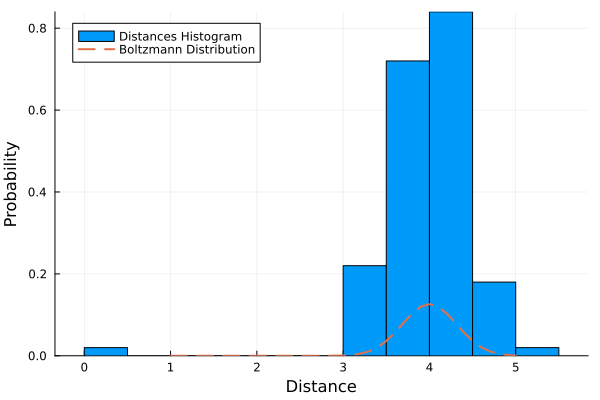

In [22]:
using Statistics, Plots

# Function to calculate harmonic energy based on distance
function harmonic_energy(distance::Float64, k::Float64, r0::Float64)
    return 0.5 * k * (distance - r0)^2
end

# Function to calculate probability distribution with Boltzmann factor
function calculate_probability_distribution_boltzmann(distances::Vector{Float64}, k::Float64, r0::Float64, temperature::Float64)
    energies = [harmonic_energy(dist, k, r0) for dist in distances]
    Z = sum(exp.(-energies / temperature))
    return exp.(-energies / temperature) / Z
end

# Function to create predicted distribution curve with Boltzmann factor
function create_distribution_curve_boltzmann(distances::Vector{Float64}, k::Float64, r0::Float64, temperature::Float64)
    prob_distribution = calculate_probability_distribution_boltzmann(distances, k, r0, temperature)
    return distances, prob_distribution
end

# Function to read distances from file and create a histogram
function create_histogram(file_path::String)
    # Read distances from file
    distances = readdlm(file_path, Float64)

    # Create histogram normalized to unity area
    hist = histogram(distances, bins=20, xlabel="Distance", ylabel="Frequency", label="Distances Histogram", normalized=true)

    return hist
end

#file_path = joinpath(homedir(), "Desktop", "praktyki", "distances.txt")

# Example parameters for harmonic potential and temperature (adjust as needed)
#k = 10.0         # Spring constant
#r0 = 2.0         # Equilibrium distance
#temperature = 1.0  # Temperature

# Example distances
distances = collect(1.0:0.1:5.0)

# Create predicted distribution curve with Boltzmann factor
distances_curve, prob_distribution_curve = create_distribution_curve_boltzmann(distances, k, r0, temperature)

# Create histogram from the data in the file
histogram_data = create_histogram(file_path)

# Plot both histogram and predicted distribution curve with normalized histogram
plot(histogram_data, xlabel="Distance", ylabel="Probability", label="Histogram and Predicted Distribution", line=:auto, lw=2)

# Add the Boltzmann distribution curve to the plot
plot!(distances_curve, prob_distribution_curve, line=:dash, lw=2, label="Boltzmann Distribution")